# AutoEncoders on Image Data (MNIST)

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

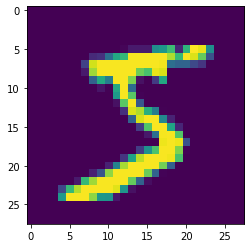

In [6]:
plt.imshow(X_train[0])

In [7]:
X_train = X_train/255
X_test = X_test/255

### Basic AutoEncoder

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [11]:
#MNIST image shape 28*28 = 784
783/2

391.5

In [12]:
encoder = Sequential()

encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(units=400, activation='relu'))
encoder.add(Dense(units=200, activation='relu'))
encoder.add(Dense(units=100, activation='relu'))
encoder.add(Dense(units=50, activation='relu'))
encoder.add(Dense(units=25, activation='relu'))

In [13]:
decoder = Sequential()

encoder.add(Dense(units=50,input_shape=[28,28], activation='relu'))
encoder.add(Dense(units=100, activation='relu'))
encoder.add(Dense(units=200, activation='relu'))
encoder.add(Dense(units=400, activation='relu'))
encoder.add(Dense(28*28, activation='sigmoid'))
encoder.add(Reshape([28,28]))

In [14]:
autoencoder = Sequential([encoder, decoder])

autoencoder.compile(loss="binary_crossentropy",
                    optimizer=SGD(lr=1.5),
                    metrics=['accuracy'])

In [15]:
autoencoder.fit(x=X_train,
                y=X_train,
               epochs=5,
               validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 23s 391us/sample - loss: 0.2475 - accuracy: 0.7906 - val_loss: 0.2022 - val_accuracy: 0.7927
Epoch 2/5
60000/60000 [==============================] - 19s 323us/sample - loss: 0.1829 - accuracy: 0.7979 - val_loss: 0.1670 - val_accuracy: 0.8002
Epoch 3/5
60000/60000 [==============================] - 20s 328us/sample - loss: 0.1598 - accuracy: 0.8019 - val_loss: 0.1532 - val_accuracy: 0.8033
Epoch 4/5
60000/60000 [==============================] - 20s 333us/sample - loss: 0.1483 - accuracy: 0.8041 - val_loss: 0.1442 - val_accuracy: 0.8050
Epoch 5/5
60000/60000 [==============================] - 19s 323us/sample - loss: 0.1416 - accuracy: 0.8054 - val_loss: 0.1376 - val_accuracy: 0.8047


In [16]:
passed_images = autoencoder.predict(X_test[:10])

In [17]:
passed_images.shape

(10, 28, 28)

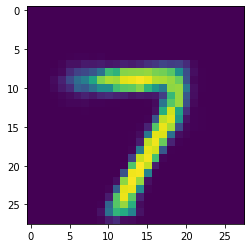

In [18]:
plt.imshow(passed_images[0])

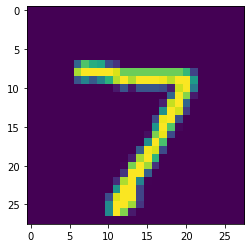

In [19]:
plt.imshow(X_test[0])

## AutoEncoders for Denoising Images

In [20]:
from tensorflow.keras.layers import GaussianNoise

In [21]:
sample = GaussianNoise(0.2)

In [22]:
noisey = sample(X_test[0:2],training=True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



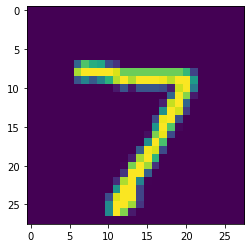

In [23]:
plt.imshow(X_test[0])

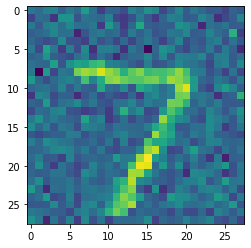

In [24]:
plt.imshow(noisey[0])

### Create noise removal autoencoder and train it.

In [25]:
import tensorflow as tf

# TO create the exact same noise as us (optional)
tf.random.set_seed(101)
np.random.seed(101)


encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [26]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [27]:
noise_remover = Sequential([encoder, decoder])

In [28]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [29]:
noise_remover.fit(X_train, 
                  X_train, 
                  epochs=8,
                  validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 26s 425us/sample - loss: 0.1713 - accuracy: 0.8011 - val_loss: 0.1322 - val_accuracy: 0.8063
Epoch 2/8
60000/60000 [==============================] - 23s 376us/sample - loss: 0.1297 - accuracy: 0.8080 - val_loss: 0.1211 - val_accuracy: 0.8086
Epoch 3/8
60000/60000 [==============================] - 23s 378us/sample - loss: 0.1217 - accuracy: 0.8094 - val_loss: 0.1155 - val_accuracy: 0.8091
Epoch 4/8
60000/60000 [==============================] - 22s 369us/sample - loss: 0.1168 - accuracy: 0.8103 - val_loss: 0.1099 - val_accuracy: 0.8100
Epoch 5/8
60000/60000 [==============================] - 24s 399us/sample - loss: 0.1124 - accuracy: 0.8110 - val_loss: 0.1059 - val_accuracy: 0.8109
Epoch 6/8
60000/60000 [==============================] - 24s 399us/sample - loss: 0.1090 - accuracy: 0.8115 - val_loss: 0.1045 - val_accuracy: 0.8114
Epoch 7/8
60000/60000 [===========================

In [30]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


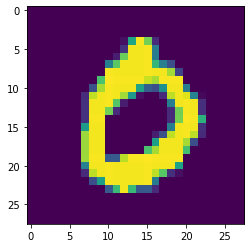

The Noisey Version


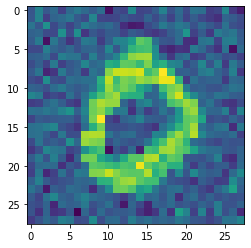

After going through denoiser


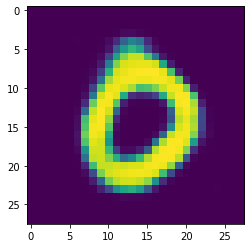

In [32]:
n = 3
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()

**AutoEncoding Nicely Done on Image Data!**